# Pytorch Notes: Overview

In [2]:
# =============================
# import some libraries
# make sure to install all potential required libraries
# =============================
import collections
# import hashlib
import math
import os
import random
import re
# import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
# from matplotlib_inline import backend_inline
import myutils

In [3]:
# two important libraries
import numpy as np
import torch

In [4]:
# some support libraries and modules for neural nerwork implementation
import torchvision
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

In [5]:
# resolve an issue in plotting the figure
# you may not need this
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [6]:
# a convention to start a new programming language
print("Hello World!")

Hello World!


# Basic Operation

In [9]:
# create a torch tensor
n = 12
x = torch.arange(n)
print(x)
# get its shape and length
print(x.shape)
print(x.numel())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12


In [10]:
# reshape the tensor
X = x.reshape(6,2)
print(X)
X = x.view(4,3)
print(X)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [11]:
# create a zero tensor
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
# create an all-one tensor
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [17]:
# create a random (normally distributed) tensor
torch.randn(3,4)
# torch.randn(3,4)   uniformly random tensor

tensor([[ 0.7679,  0.4737,  0.2935, -2.7588],
        [-0.1369, -1.2027,  2.0478,  1.2149],
        [-0.7671, -0.2859, -0.8393,  0.1257]])

In [18]:
# convert a list to torch tensor
torch.tensor([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype = torch.int64)

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [19]:
# element-wise operations for pytorch tensor
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2 ,2])
x + y, x - y, x * y, x / y, x ** y
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [20]:
# concatenation of two tensors
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
# change the tensor's data type
X.to(torch.float64)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [22]:
# element-wise logic operation
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [23]:
# aggregation 
print(X.sum())
print(torch.sum(X))

tensor(66.)
tensor(66.)


In [24]:
# add with different shape
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2)) + 1
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[1, 2]]),
 tensor([[1, 2],
         [2, 3],
         [3, 4]]))

In [25]:
# indexing of torch tensor
X[-1], X[1:3,]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [22]:
# change the element of torch tensor
X[1, 2] = 9
print(X)

X[0: 2, :] = 12
print(X)

tensor([[12, 12, 12],
        [12, 12,  9],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[12, 12, 12],
        [12, 12, 12],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [25]:
# saving memory
# in-place operation
before = id(Y)
# 新开辟空间存放左边新赋值的Y
Y = Y + X
id(Y) == before
# Memory id changes!

False

In [48]:
before = id(Y)
# 新的Y存放空间覆盖原来的Y
Y += X
id(Y) == before
# Memory id does not change!

True

In [26]:
# change type, numpy array to torch tensor
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [27]:
# get scalar, tensor to value
a = torch.tensor([5.5])
print(a.dtype)
a, a.item(), float(a), int(a), a.numel()

torch.float32


(tensor([5.5000]), 5.5, 5.5, 5, 1)

# Read Data

In [28]:
# create a directory
os.makedirs("./chpdata", exist_ok = True)

In [29]:
# create a csv file
data_file = './chpdata/house_tiny.csv'
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [30]:
# read csv file through pandas library
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [31]:
# deal with NaN
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [32]:
# make NaN to dummy variables
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [33]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# more stuff on linear algebra

In [50]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [51]:
# vector
x = torch.arange(4)
x, len(x), x.shape

(tensor([0, 1, 2, 3]), 4, torch.Size([4]))

In [29]:
# create a matrix
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [33]:
np.exp(1) / (np.exp(1) + np.exp(2) + np.exp(3) + np.exp(4))

0.03205860328008499

In [30]:
# get familiar with softmax function
torch.softmax(A.float(), dim=1)

tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439],
        [0.0321, 0.0871, 0.2369, 0.6439]])

In [54]:
# transpose A
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [35]:
# symmetric matrix
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [56]:
# high-order tensor (three way)
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [39]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
# 这样改变B，也不会改变原来的A，clone类似于numpy中的copy
B = A.clone() # 通过分配新内存，将A的⼀个副本分配给B
A, B, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [40]:
# hardmard product
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [59]:
# operation with scalar
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [42]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [43]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [44]:
A_sum_axis0 = A.sum(axis=0) # sum along axis 0
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [45]:
A_sum_axis1 = A.sum(axis=1) # sum along axis 1
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [77]:
A.sum(axis=[0, 1]), A.sum() # sum along two axis 

(tensor(190.), tensor(190.))

In [78]:
A.mean(), A.sum() / A.numel() # overall mean

(tensor(9.5000), tensor(9.5000))

In [79]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0] # mean along axis 0

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [47]:
sum_A = A.sum(axis=1, keepdims=True) # keep dim to be the same size
sum_A, sum_A.shape

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 torch.Size([5, 1]))

In [81]:
A / sum_A # row normalization

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [82]:
A.cumsum(axis=0)  # cumulative sum along row

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [35]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([1., 2., 4., 8.]), tensor([1., 1., 1., 1.]), tensor(15.))

In [34]:
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)

In [51]:
A.shape, x.shape, torch.mv(A, x), torch.matmul(A, x)

(torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

In [41]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [86]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [87]:
torch.abs(u).sum() # L1-norm

tensor(7.)

In [88]:
torch.norm(torch.ones((4, 9))) # Frobenius norm

tensor(6.)

# 自动微分

### 导数定义

In [36]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [39]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


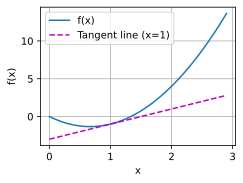

In [40]:
x = np.arange(0, 3, 0.1)
myutils.plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 对一个标量y自动微分

In [11]:
x = torch.arange(4.0)
x.requires_grad_(True)
# 等价写法：
# x = torch.arange(4.0, requires_grad=True)
print(x.grad)
x

None


tensor([0., 1., 2., 3.], requires_grad=True)

In [12]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [13]:
# 进行自动微分， pytorch 动态地构造计算图。
# 运行backawrd方法后，会启动计算图，y关于自变量x的梯度会被计算出来，并且累加到x.grad
# 因此，如果需要重新计算新的梯度，需要先将原来的梯度清空(e.g. x.grad.zero_())
y.backward()
print(x.grad)
print(y.grad) # y是没有梯度的

tensor([ 0.,  4.,  8., 12.])
None


In [62]:
z = 2 * torch.dot(x, x)
z.backward()
x.grad # 梯度会自动累积

tensor([ 0.,  8., 16., 24.])

In [63]:
x.grad.zero_() # 梯度清零
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

另外一个例子：自动微分部分，需要特别注意只能对一个scalar output使用backward，否则在backward内需要加上gradient参数

In [73]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [74]:
# Q是一个向量，必须要加上一个gradient方法，表示将Q的分量求sum
Q.backward(gradient=torch.tensor([1, 1]))
# 等价于: 
# Q = Q.sum()
# Q.backward()

In [75]:
a.grad, 9 * a**2, b.grad, - 2 * b

(tensor([36., 81.]),
 tensor([36., 81.], grad_fn=<MulBackward0>),
 tensor([-12.,  -8.]),
 tensor([-12.,  -8.], grad_fn=<MulBackward0>))

### with torch.no_grad()

最关键的就是，在with torch.no_grad()里面的定义的tensor的requires_grad属性是False，无法调用backward方法。这样操作可以节省内存。

In [116]:
# with torch.no_grad()是一个上下文管理器，用于禁用梯度计算。
# 在PyTorch中，如果一个张量的requires_grad属性被设置为True，则反向传播时，该张量就会自动求导。
# 但是，在某些情况下，我们不需要计算梯度，例如在模型测试时。这时，我们可以使用with torch.no_grad()来禁用梯度计算，
# 以减少内存的使用并加快代码的运行速度。
# 在with torch.no_grad()代码块中计算得到的张量的requires_grad属性都会被自动设置为False，
# 以避免不必要的内存消耗和计算开销。通常情况下，with torch.no_grad()会在测试模型时使用。
# 部分变量不需要梯度回传，我们使用with torch.no_grad()
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2 
with torch.no_grad():
    # 不回传梯度
    y2 = x ** 3
y3 = y1 + y2
    
print(x.requires_grad)  # True
print(y1, y1.requires_grad)  # True
print(y2, y2.requires_grad)  # False
print(y3, y3.requires_grad)  # True

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


### retain_grad()

In [113]:
#  获取中间变量的梯度
x = torch.tensor(3., requires_grad=True)
y = x ** 2
z = 4 * y

# 这里y是中间变量，默认不保存y的梯度
# y.retain_grad()   # 使用 retain_grad 可以用来获取中间变量的梯度

z.backward()
print(x.grad)   # tensor(24.)
print(y.grad)   # None

tensor(24.)
tensor(4.)
